In [8]:
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean
from statistics import harmonic_mean
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['text.usetex'] = True

lz4_cr = [3.21, 1.76, 3.98, 1.39, 2.37, 3.1]
culzss_cr = [4.61, 2.01, 6.51, 1.44, 2.54, 2.68]
gpulz_cr = [4.91, 1.97, 7.19, 1.34, 2.43, 2.84]
gpulz_cr_best = [5.73, 2.2, 9.01, 1.6, 3.19, 3.07]

lz4_ctp_a4000 = [7.07, 10.4, 25.14, 5.87, 7.84, 23.46]
# lz4_dtp_a4000 = [10.05, 16.73, 37.21, 9.83, 12.64, 0]
culzss_otp_a4000 = [0.15, 0.22, 0.41, 0.07, 0.1, 0.24]
culzss_ktp_a4000 = [3.11, 2.79, 3.12, 3.0, 2.83, 3.03]
gpulz_ctp_a4000 = [3.08, 3.05, 3.57, 3.02, 3.28, 3.38]
# gpulz_dtp_a4000 = [10.05, 16.73, 37.21, 9.83, 12.64, 0]
gpulz_ctp_a4000_best = [18.07, 18.14, 18.14, 19.05, 18.14, 19.05]

culzss_otp_a100 = [0.04, 0.27, 0.2, 0.01, 0.02, 0.13]
culzss_ktp_a100 = [6.44, 6.05, 6.0, 4.54, 4.04, 6.09]
lz4_ctp_a100 = [5.47, 18.84, 27.06, 2.92, 4.61, 22.12]
gpulz_ctp_a100 = [4.87, 4.76, 5.48, 4.75, 4.77, 4.89]
gpulz_ctp_a100_best = [29, 28.96, 28.96, 30.26, 28.96, 30.26]

cr = {
    "lz4": lz4_cr,
    "culzss": culzss_cr,
    "gpulz": gpulz_cr,
    "gpulz\nbest": gpulz_cr_best
}

a4000 = {
    'lz4': lz4_ctp_a4000,
    'culzss': culzss_otp_a4000,
    'culzss\nkernel': culzss_ktp_a4000,
    'gpulz': gpulz_cr,
    'gpulz\nbest': gpulz_ctp_a4000_best,
}

a100 = {
    'lz4': lz4_ctp_a100,
    'culzss': culzss_otp_a100,
    'culzss\nkernel': culzss_ktp_a100,
    'gpulz': gpulz_ctp_a100,
    'gpulz\nbest': gpulz_ctp_a100_best,
}


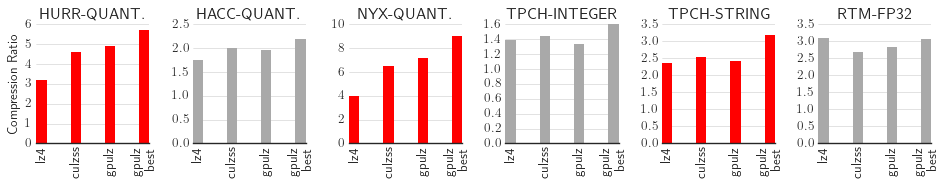

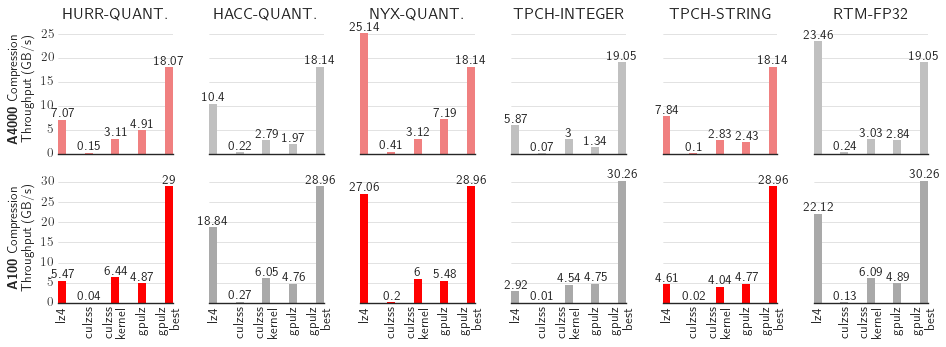

In [53]:
def ics_draw(dict_data, label_at_left, fig, axes, themecolor=('red', 'darkgray'), enable_subtitle=True, ylims=None, barlabel=False, enable_xticklabel=True):
    plt.style.use("seaborn-white")
    sns.despine(left=True)

    # name_list = ['lz4', 'culzss', 'gpulz', 'gpulz\nbest']
    datasets = ['hurr-quant.', 'hacc-quant.', 'nyx-quant.', 'tpch-integer', 'tpch-string', 'rtm-fp32']

    name_list = list(dict_data.keys())
    results = list(zip(*dict_data.values()))

    bars = []

    for col, _ in enumerate(datasets):
        b = axes[col].bar(name_list, results[col],
                      width=0.3,
                      color=themecolor[0] if col % 2 == 0 else themecolor[1],
                      edgecolor='none'
                      )
        # bars.append(b)
        # axes[col].bar_label(b, label_type='center')
        if barlabel:
            axes[col].bar_label(b)

        if enable_subtitle:
            axes[col].set_title(datasets[col].upper())
        axes[col].grid(axis='y')

        if enable_xticklabel:
            axes[col].set_xticklabels(name_list, rotation=90, multialignment='right')
        else:
            axes[col].set_xticks([])

    axes[0].set_ylabel(label_at_left)
    if ylims:
        axes[0].set_ylim(ylims)



fig, axes = plt.subplots(ncols=6, figsize=(12, 2.5), sharey=False)
ics_draw(cr, "Compression Ratio", fig, axes, enable_subtitle=True)
fig.tight_layout()
plt.show()
fig.savefig("cr.pdf")

fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(12, 4.5), sharey='row')
ics_draw(a4000, "{\\bfseries A4000} Compression\nThroughput (GB/s)", fig, axes[0], themecolor=('lightcoral', 'silver'), ylims=(0,27), barlabel=True, enable_xticklabel=False)
ics_draw(a100, "{\\bfseries A100} Compression\nThroughput (GB/s)", fig, axes[1], ylims=(0, 32), barlabel=True, enable_subtitle=False, enable_xticklabel=True)
fig.tight_layout()
plt.show()
fig.savefig("throughput-2gpu.pdf")

